In [2]:
import numpy as np 
import pandas as pd
import sklearn 
import seaborn as sb
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer


In [3]:
data = pd.read_csv('D:\Computer science\Python\Machine-Learning\Projects\marketing_compign\\marketing_campaign.csv',sep='\t')
print('The number of data points are about :',len(data))
data.head()


The number of data points are about : 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan , strategy='mean')
data.iloc[:,[4]]= si.fit_transform(data.iloc[:,[4]])
print('There are no Missing values now')
data.isnull().sum()

There are no Missing values now


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],format='%d-%m-%Y')

dates=[]

for i in data['Dt_Customer']:
    i = i.year
    dates.append(i)
print('Latest customer date :',max(dates))
print('Earliest customer date :' ,min(dates))

Latest customer date : 2014
Earliest customer date : 2012


In [7]:
years=[]

for i in dates:
    d1 =(max(dates)+1)-i
    years.append(d1)
        
print('The longest time for a customer is about {} years '.format(max(years)))
print('The most recent time for a customer is about {} years '.format(min(years)))


The longest time for a customer is about 3 years 
The most recent time for a customer is about 1 years 


In [8]:
data['Customer for']=years
data['Customer for']= pd.to_numeric(data['Customer for'])
print('Diffrent times based on year for all customers',data['Customer for'].unique())

Diffrent times based on year for all customers [3 1 2]


In [9]:
print('Total categories of marital status of customers',data['Marital_Status'].value_counts(),'\n')
print('total categories of education of customers',data['Education'].value_counts())

Total categories of marital status of customers Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

total categories of education of customers Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [10]:
data['Age'] = 2021-data['Year_Birth'] 

data['living_with'] = data['Marital_Status'].replace({'Single':'Alone', 'Together':'Partner', 'Married':'Partner', 'Divorced':'Alone', 'Widow':'Alone', 'Alone':'Alone',
       'Absurd':'Alone', 'YOLO':'Alone'})

data['Children'] = data['Teenhome']+data['Kidhome']

data['Family_Size'] = data['living_with'].replace({'Alone':1 , 'Partner':2})+data['Children']

data['IsParent'] = np.where(data['Children']>0,1,0)

data['Education'] = data['Education'].replace({'Graduation':'underGraduate', 'PhD':'postGraduate', 'Master':'Graduate', 'Basic':'underGraduate', '2n Cycle':'underGraduate'})

data['spent'] = data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

data = data.rename(columns={'MntWines':'Wins' ,'MntFruits':'Fruits' ,'MntMeatProducts':'Meat', 'MntFishProducts':'Fish','MntSweetProducts':'Sweet' ,'MntGoldProds':'Gold' })

data.drop(['Marital_Status','Z_Revenue','Z_CostContact' ,'Dt_Customer','Year_Birth','ID'],axis=1 , inplace=True)


In [11]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wins,Fruits,Meat,Fish,Sweet,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer for,Age,Children,Family_Size,IsParent,spent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.064286,0.013393,0.009375,0.149107,1.971875,52.194196,0.950446,2.595089,0.715179,605.798214
std,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.245316,0.114976,0.096391,0.356274,0.684554,11.984069,0.751803,0.906959,0.451430,602.249288
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,1.000000,0.000000,5.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,44.000000,0.000000,2.000000,0.000000,68.750000
50%,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,51.000000,1.000000,3.000000,1.000000,396.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,62.000000,1.000000,3.000000,1.000000,1045.500000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,128.000000,3.000000,5.000000,1.000000,2525.000000


<Figure size 864x864 with 0 Axes>

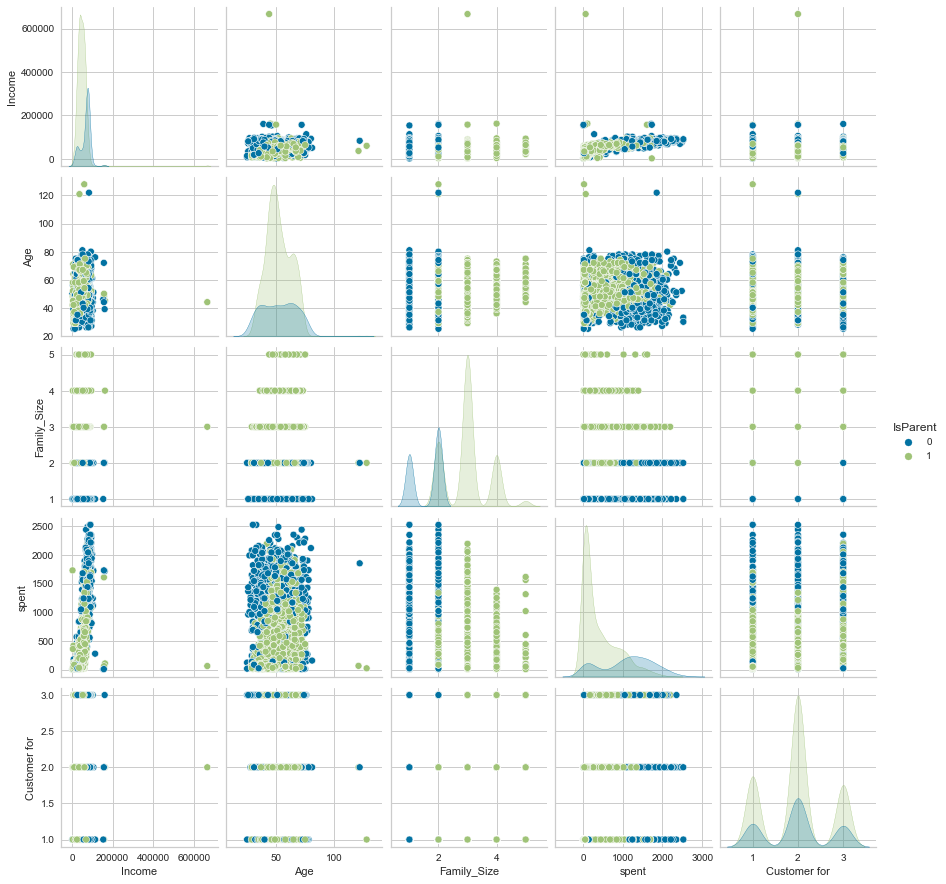

In [12]:
po=['Income','Age','Family_Size','spent','IsParent','Customer for']
plt.figure(figsize=(12,12))
sb.pairplot(data[po],hue='IsParent')
plt.show()

In [13]:
data=data[(data['Age']<80)]
data=data[(data['Income']<600000)]
print('The number of data points after removing outliers : ',len(data))

The number of data points after removing outliers :  2234


In [14]:
print('mean Categories of being Customer based on age',data.groupby(data['Customer for'])['Age','Income'].mean())

mean Categories of being Customer based on age                     Age        Income
Customer for                         
1             52.098921  52809.884902
2             52.434966  51864.657113
3             51.192308  51159.119444


C:\Users\kahza\AppData\Local\Temp/ipykernel_10976/2430741741.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print('mean Categories of being Customer based on age',data.groupby(data['Customer for'])['Age','Income'].mean())


In [15]:
print('max Categories of being Customer based on age','\n',data.groupby(data['Customer for'])['spent'].max())

max Categories of being Customer based on age 
 Customer for
1    2525
2    2524
3    2352
Name: spent, dtype: int64


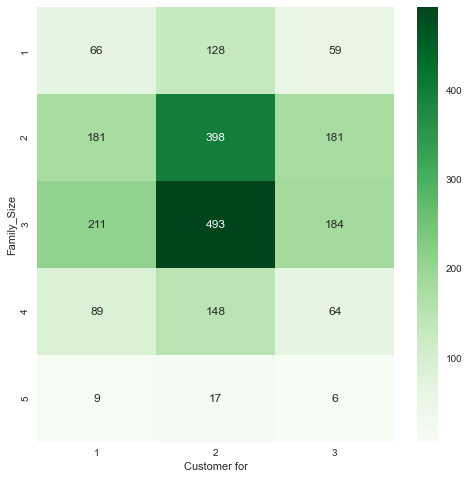

In [16]:
Fam_Time = pd.crosstab(data.Family_Size , data['Customer for'])

plt.figure(figsize=(8,8))
sb.heatmap(Fam_Time , cbar=True , annot=True , cmap='Greens' , fmt='d')
plt.show()

In [17]:
data.groupby(data['Customer for'])[['Income','Wins','Meat','Fish','Gold','Fruits','Sweet','spent']].mean()

,Income,Wins,Meat,Fish,Gold,Fruits,Sweet,spent
Customer for,,,,,,,,
1,52809.884902,236.802158,143.089928,33.571942,31.588129,23.338129,23.106115,491.496403
2,51864.657113,299.720439,165.132601,36.520270,46.087838,26.228041,26.960304,600.649493
3,51159.119444,388.803644,197.524291,44.473684,53.012146,29.718623,31.951417,745.483806


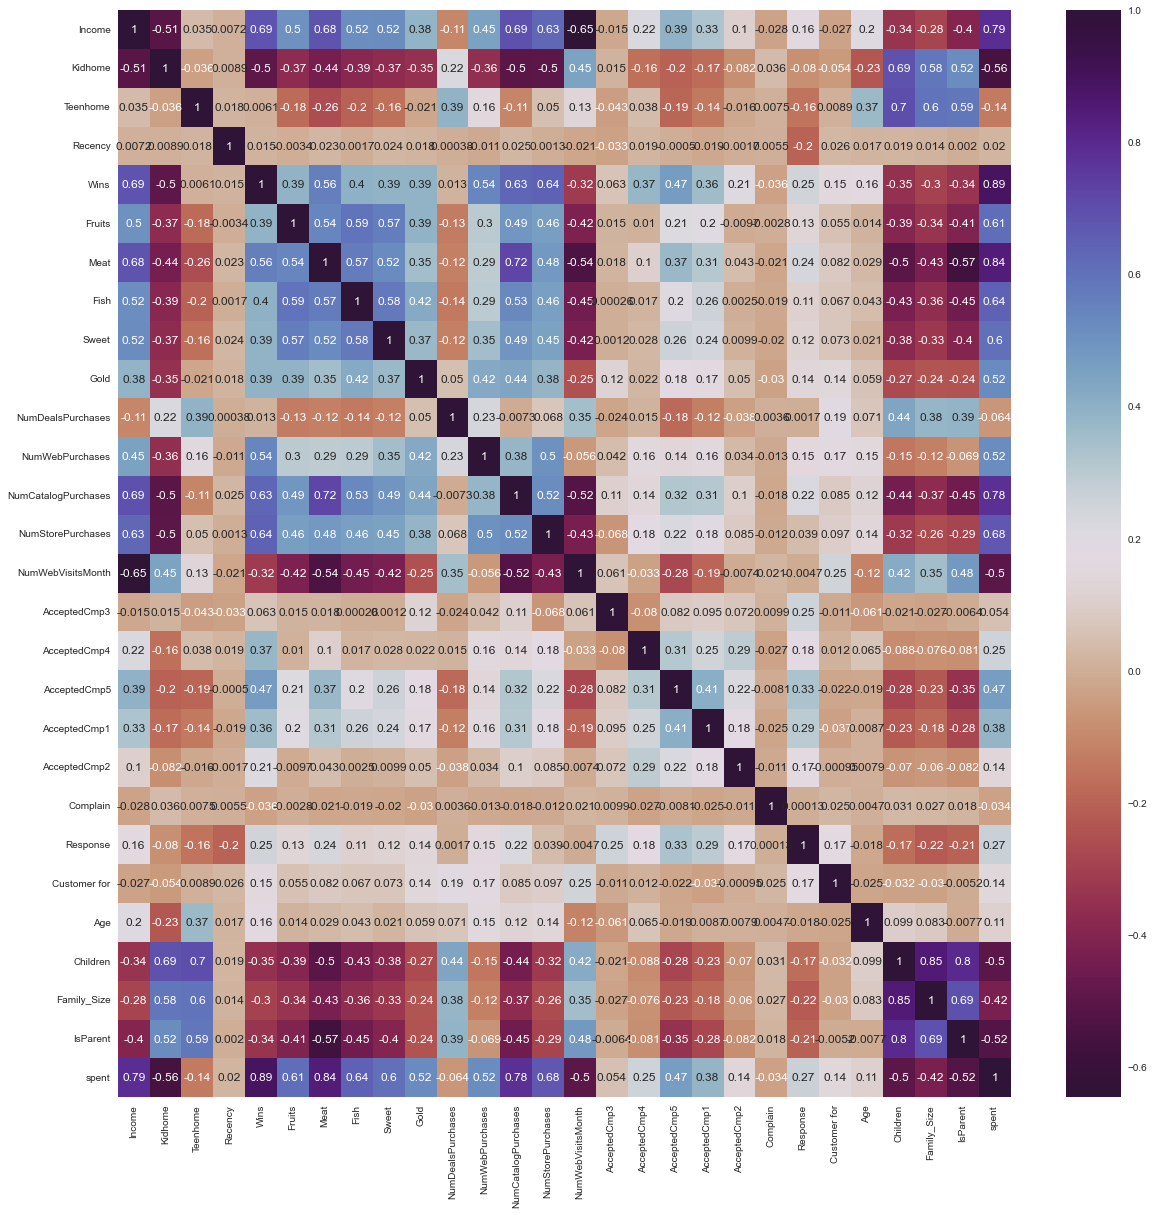

In [18]:
corr = data.corr()

plt.figure(figsize=(20,20))
sb.heatmap(corr , cbar=True , annot=True , cmap='twilight_shifted_r')
plt.show()


In [19]:
print('Feature corelation based on total spent of Customers:')
corr.sort_values(by='spent',ascending=False).iloc[0].sort_values(ascending=False)

Feature corelation based on total spent of Customers:


spent                  1.000000
Wins                   0.891369
Meat                   0.842156
Income                 0.788985
NumCatalogPurchases    0.777679
NumStorePurchases      0.676649
Fish                   0.642819
Fruits                 0.613482
Sweet                  0.604175
Gold                   0.523798
NumWebPurchases        0.519584
AcceptedCmp5           0.466430
AcceptedCmp1           0.382858
Response               0.266378
AcceptedCmp4           0.254233
Customer for           0.144090
AcceptedCmp2           0.136289
Age                    0.112228
AcceptedCmp3           0.053689
Recency                0.020346
Complain              -0.033761
NumDealsPurchases     -0.063831
Teenhome              -0.137726
Family_Size           -0.424292
Children              -0.498703
NumWebVisitsMonth     -0.499393
IsParent              -0.523416
Kidhome               -0.557093
Name: spent, dtype: float64

In [20]:
t = (data.dtypes == 'object')
obj_cols = list(t[t].index)
print('Categorical variables in the dataset',obj_cols)

Categorical variables in the dataset ['Education', 'living_with']


In [21]:
Le = LabelEncoder()

for i in obj_cols:
    data[i] = data[[i]].apply(Le.fit_transform)
print('All Features are now numerical','\n',data.dtypes)


All Features are now numerical 
 Education                int32
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Wins                     int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweet                    int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Customer for             int64
Age                      int64
living_with              int32
Children                 int64
Family_Size              int64
IsParent                 int32
spent                    int64
dtype: object


In [22]:
df = data.copy()

del_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df.drop(del_cols,axis=1 , inplace=True)

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df) , columns=df.columns)

print('All features are now scaled')


All features are now scaled


In [23]:
print('DataFrame to be used for furthur modelling:')
scaled_df.head()

DataFrame to be used for furthur modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wins,Fruits,Meat,Fish,Sweet,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer for,Age,living_with,Children,Family_Size,IsParent,spent
0,0.719460,0.289464,-0.825560,-0.931393,0.308119,0.985805,1.553563,1.682185,2.460119,1.474433,...,2.513273,-0.552584,0.692176,1.500347,1.021282,-1.348017,-1.265779,-1.760493,-1.586855,1.682807
1,0.719460,-0.261695,1.031742,0.905087,-0.382948,-0.871285,-0.636350,-0.713390,-0.650371,-0.632064,...,-0.568690,-1.167667,-0.132089,-1.419318,1.278242,-1.348017,1.394382,0.444688,0.630177,-0.962463
2,0.719460,0.919179,-0.825560,-0.931393,-0.797589,0.363799,0.571878,-0.176604,1.344002,-0.147812,...,-0.226250,1.292666,-0.544222,0.040515,0.336057,0.741830,-1.265779,-0.657902,-1.586855,0.283642
3,0.719460,-1.182225,1.031742,-0.931393,-0.797589,-0.871285,-0.560836,-0.651283,-0.503995,-0.583639,...,-0.911130,-0.552584,0.280044,-1.419318,-1.291355,0.741830,0.064301,0.444688,0.630177,-0.919207
4,-0.594746,0.296707,1.031742,-0.931393,1.552040,-0.389156,0.420849,-0.216530,0.154697,-0.002536,...,0.116191,0.062500,-0.132089,-1.419318,-1.034395,0.741830,0.064301,0.444688,0.630177,-0.305305


In [24]:
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df),columns=(['PC1','PC2','PC3']))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2234.0,2.544468e-17,2.872369,-5.949971,-2.528454,-0.787242,2.378477,7.470491
PC2,2234.0,8.905639e-17,1.707662,-4.300422,-1.335013,-0.153343,1.229975,6.141028
PC3,2234.0,4.095003e-17,1.231392,-3.621222,-0.828857,-0.041372,0.816656,6.324972


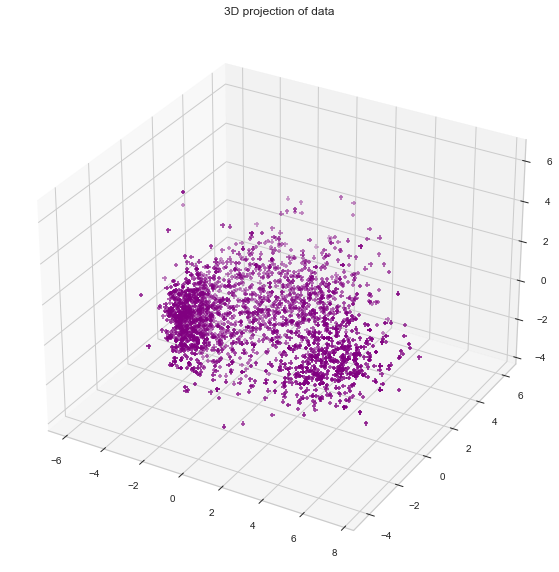

In [25]:
pc1 = pca_df['PC1'] 
pc2 = pca_df['PC2']
pc3 = pca_df['PC3']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(pc1,pc2,pc3 , c ='purple',marker='+')
ax.set_title('3D projection of data')
plt.show()

Elbow method to determine the number of clusters to be formed:


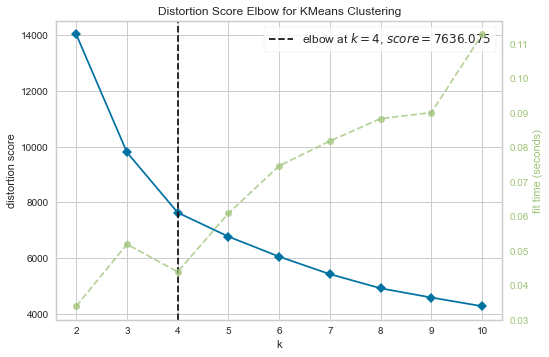

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
print('Elbow method to determine the number of clusters to be formed:')
Elbow = KElbowVisualizer(KMeans(),k=10)
Elbow.fit(pca_df)
Elbow.show()

In [27]:
AC = AgglomerativeClustering(n_clusters=4)
pred_ac =AC.fit_predict(pca_df)
pca_df['Clusters'] = pred_ac
data['Clusters'] = pred_ac

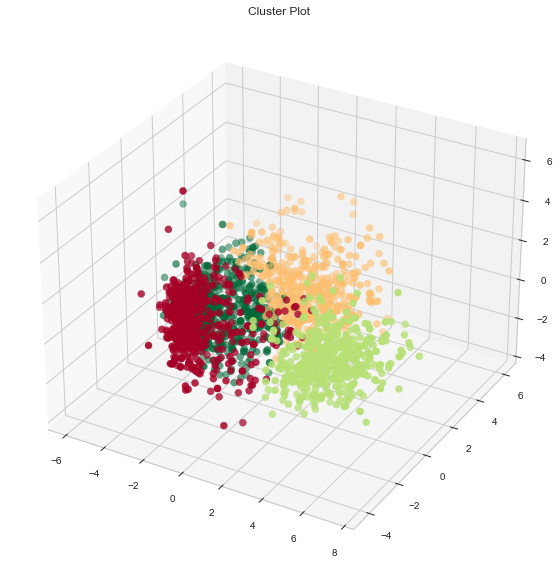

In [28]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(pc1,pc2,pc3,s=50 , c=pca_df['Clusters'],marker='o' , cmap='RdYlGn')
ax.set_title('Cluster Plot')
plt.show()

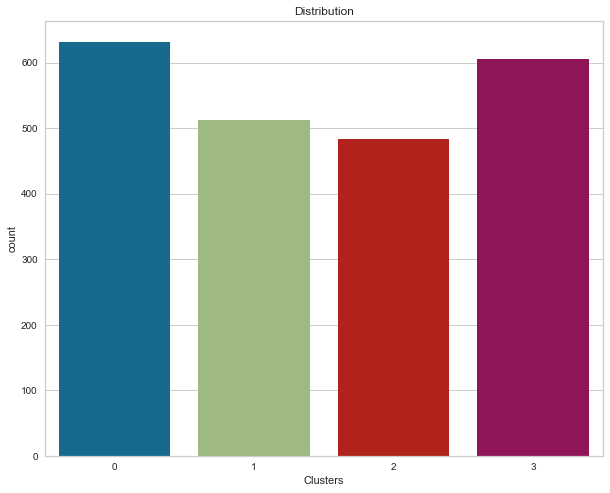

In [29]:
plt.figure(figsize=(10,8))
sb.countplot(x=data.Clusters)
plt.title('Distribution')
plt.show()

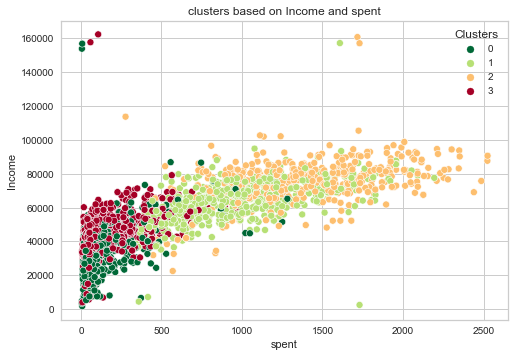

In [30]:

sb.scatterplot(data=data , x=data.spent , y=data.Income , hue=data.Clusters , palette='RdYlGn_r')
plt.title('clusters based on Income and spent')
plt.show()

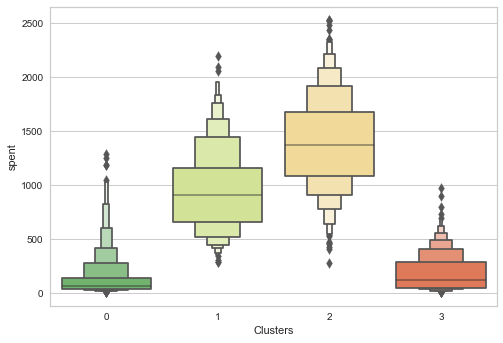

In [31]:
plt.figure()
sb.boxenplot(x=data.Clusters , y= data.spent , palette='RdYlGn_r')
plt.show()

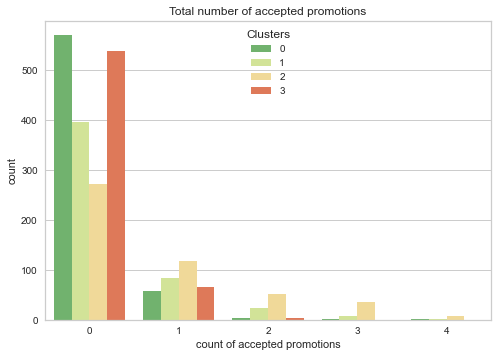

In [32]:
data['Total promotions'] = data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+data['AcceptedCmp1']+data['AcceptedCmp2']

plt.figure()
sb.countplot(x=data['Total promotions'],hue=data.Clusters, palette='RdYlGn_r')
plt.xlabel('count of accepted promotions')
plt.title('Total number of accepted promotions')
plt.show()

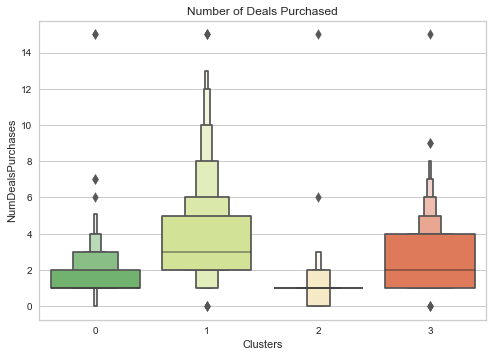

In [33]:
plt.figure()
sb.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= 'RdYlGn_r')
plt.title("Number of Deals Purchased")
plt.show()

<Figure size 576x396 with 0 Axes>

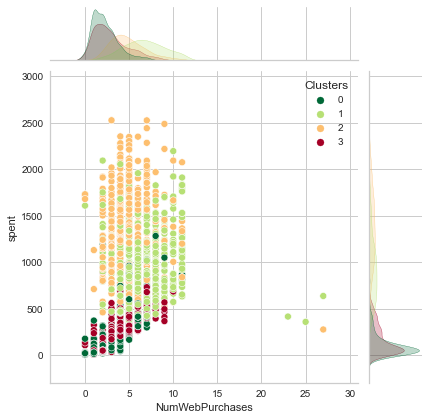

<Figure size 576x396 with 0 Axes>

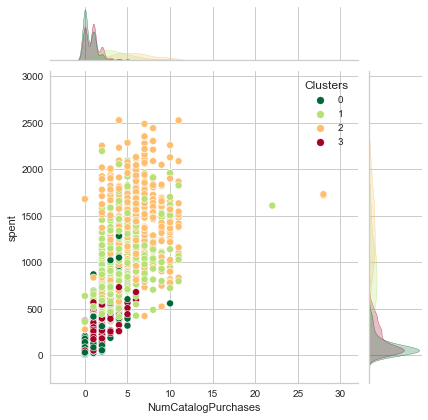

<Figure size 576x396 with 0 Axes>

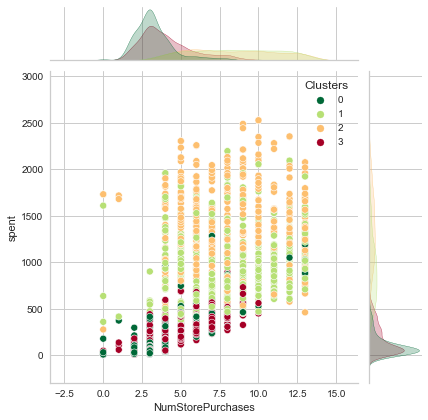

<Figure size 576x396 with 0 Axes>

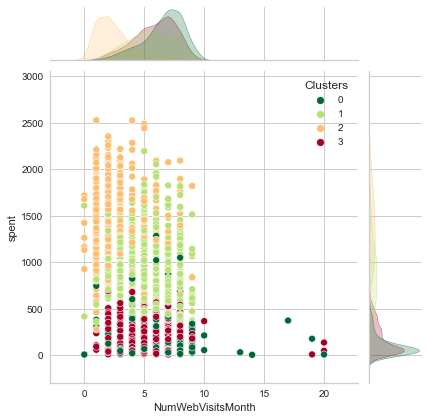

In [34]:
Style =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 

for i in Style:
    plt.figure()
    sb.jointplot(x=data[i],y = data["spent"],hue=data["Clusters"], palette= 'RdYlGn_r')
    plt.show()

<Figure size 576x396 with 0 Axes>

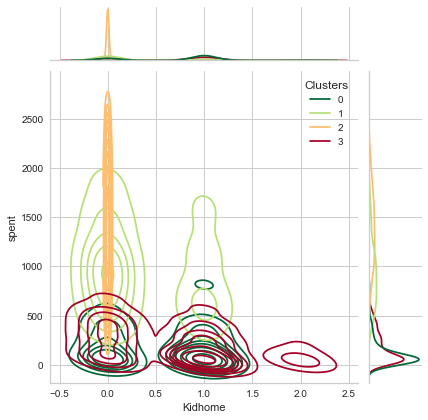

<Figure size 576x396 with 0 Axes>

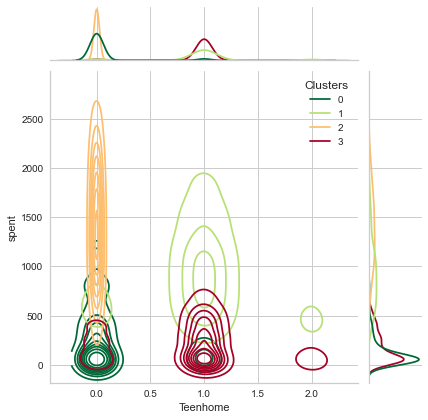

<Figure size 576x396 with 0 Axes>

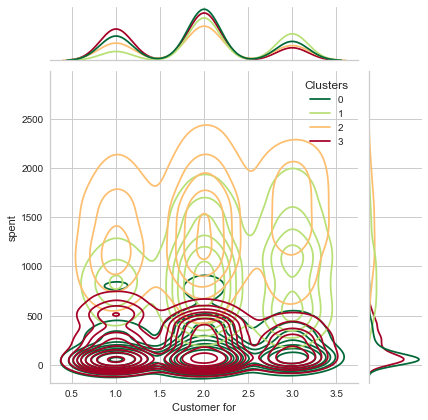

<Figure size 576x396 with 0 Axes>

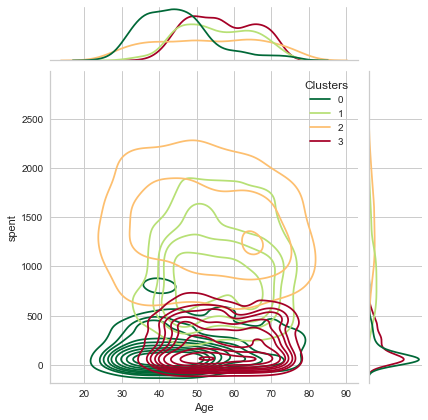

<Figure size 576x396 with 0 Axes>

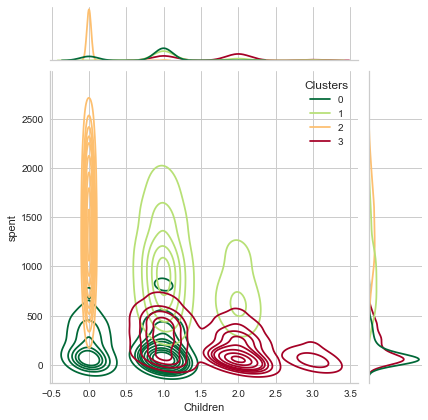

<Figure size 576x396 with 0 Axes>

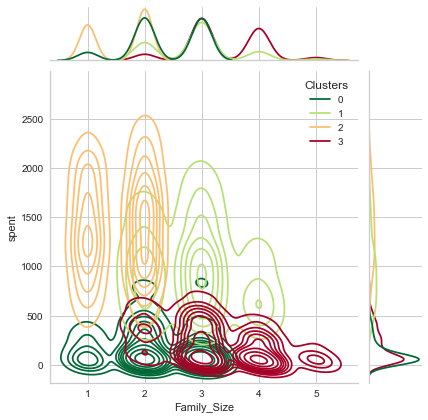

C:\Users\kahza\miniconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

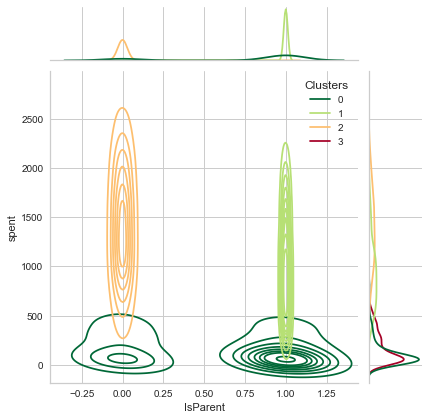

<Figure size 576x396 with 0 Axes>

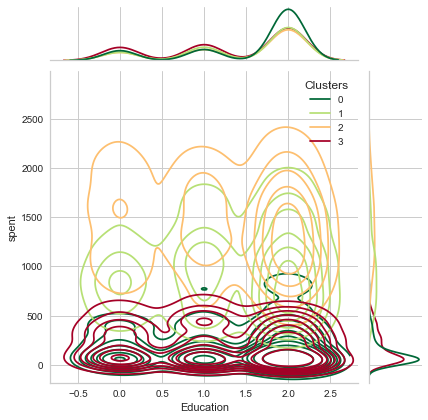

<Figure size 576x396 with 0 Axes>

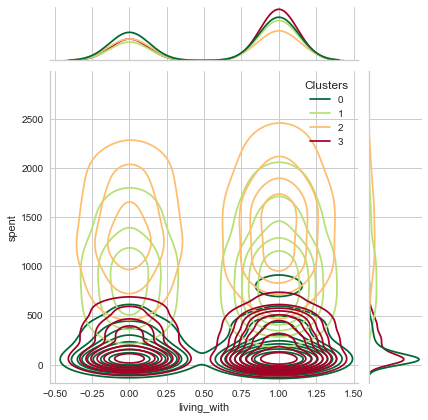

In [36]:
Personal = [ "Kidhome","Teenhome","Customer for", "Age", "Children", "Family_Size", "IsParent", "Education","living_with"]

for i in Personal:
    plt.figure()
    sb.jointplot(x=data[i], y=data["spent"], hue =data["Clusters"], kind="kde", palette='RdYlGn_r')
    plt.show()
